In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import yfinance as yfin
import math
import matplotlib_inline.backend_inline 
import statsmodels.api as sm
from pandas_datareader import data as pdr
import plotly.graph_objects as go

matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'png')

plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"

In [2]:
# Problem 3: Numerical Solution for t = 1

def dpdt(p, K):
    return p * (1 - p/K)

def euler(p0, K, f, t_max, step_size):
    t = [0]
    p = [p0]
    for i in range (int(t_max/step_size)):
        t.append(t[i] + step_size)
        p_new = p[i] + step_size * f(p[i], K)
        p.append(p_new)
    return t, p

p0 = 5  
K = 100  
t_max = 10
step_size = 0.01

t, p = euler(p0, K, dpdt, t_max, step_size)
t[100], p[100]

(1.0000000000000007, 12.470668118998324)

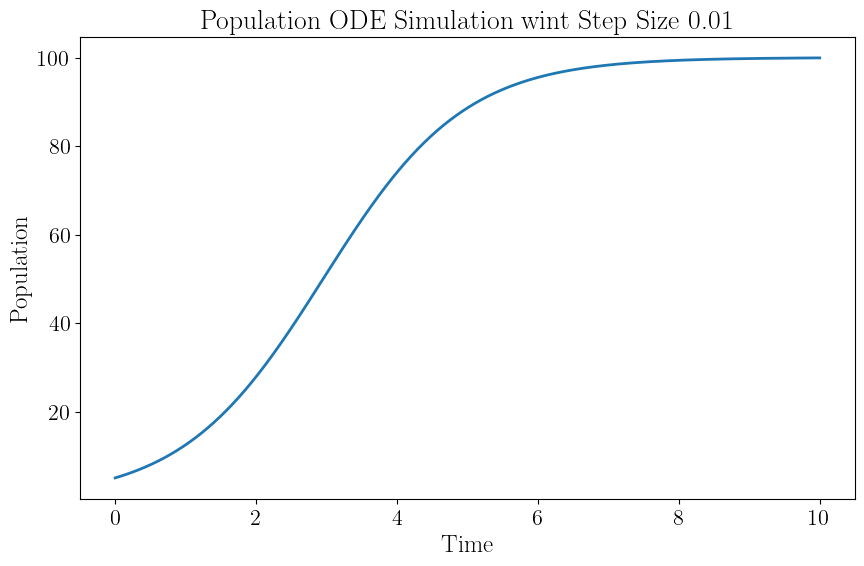

In [3]:
# Problem 3: Population Simulation

plt.plot(t, p)
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population ODE Simulation wint Step Size ' + str(step_size))
plt.show()

In [4]:
# Problem 3: Step Size on Quality of Approximate Solution
step_size = 1
t, p = euler(p0, K, dpdt, t_max, step_size)
t[1], p[1]

(1, 9.75)

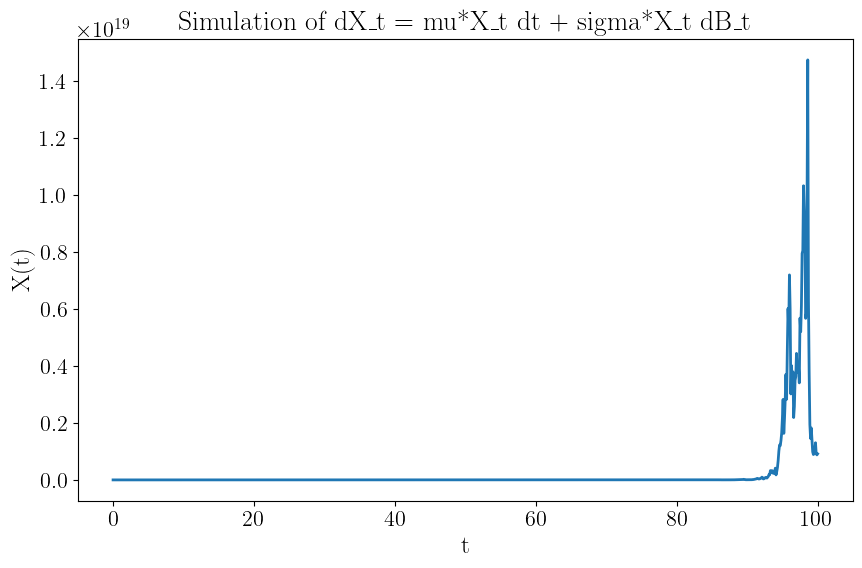

In [25]:
# Problem 8: SDE Numerical Simulation

def SDE_simulation (mu, sigma):
    T = 100
    N = 1000
    dt = T/N
    X0 = 1

    X = np.zeros(N+1)
    X[0] = X0

    for i in range(N):
        dX = mu*X[i]*dt + sigma*X[i]*np.sqrt(dt)*np.random.normal()
        X[i+1] = X[i] + dX

    t = np.linspace(0, T, N+1)
    plt.plot(t, X)
    plt.xlabel('t')
    plt.ylabel('X(t)')
    plt.title('Simulation of dX_t = mu*X_t dt + sigma*X_t dB_t')
    plt.show()

mu = 1
sigma = 1
SDE_simulation(mu, sigma)

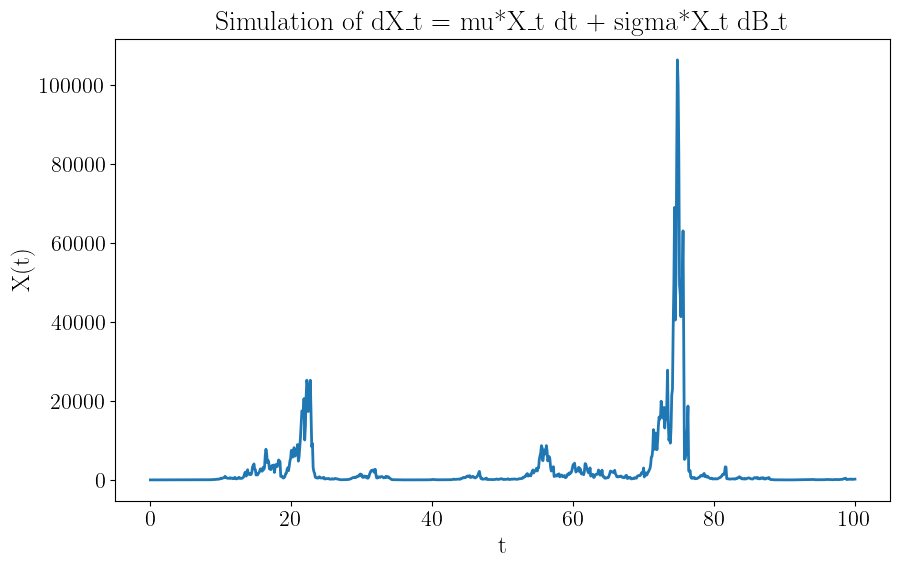

In [78]:
mu = 0.5
SDE_simulation(mu, sigma)

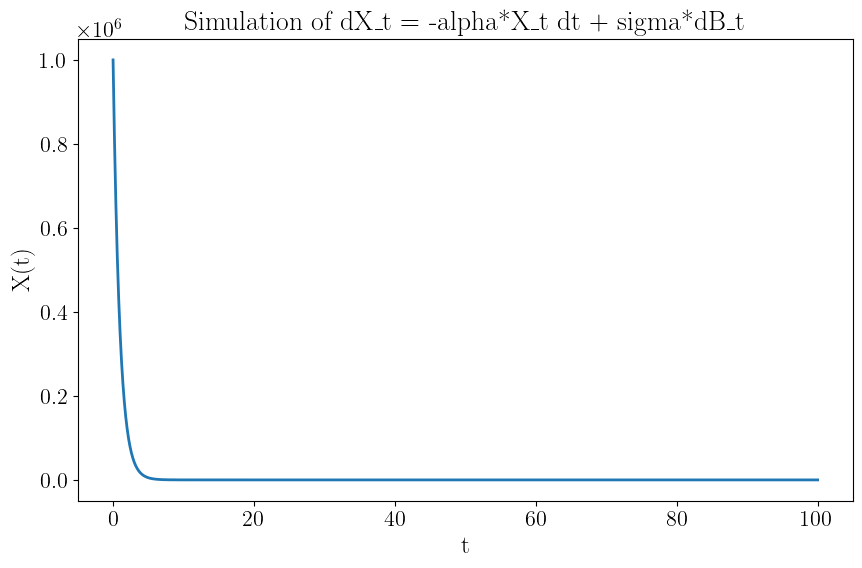

In [82]:
# Problem 8: OU Simulation

def OU_simulation(alpha, sigma, X0):
    T = 100
    N = 1000
    dt = T/N

    X = np.zeros(N+1)
    X[0] = X0

    for i in range(N):
        dX = -alpha*X[i]*dt + sigma*np.sqrt(dt)*np.random.normal()
        X[i+1] = X[i] + dX

    t = np.linspace(0, T, N+1)
    plt.plot(t, X)
    plt.xlabel('t')
    plt.ylabel('X(t)')
    plt.title('Simulation of dX_t = -alpha*X_t dt + sigma*dB_t')
    plt.show()

alpha = 1
sigma = math.sqrt(2)
X0 = 1000000

OU_simulation(alpha, sigma, X0)

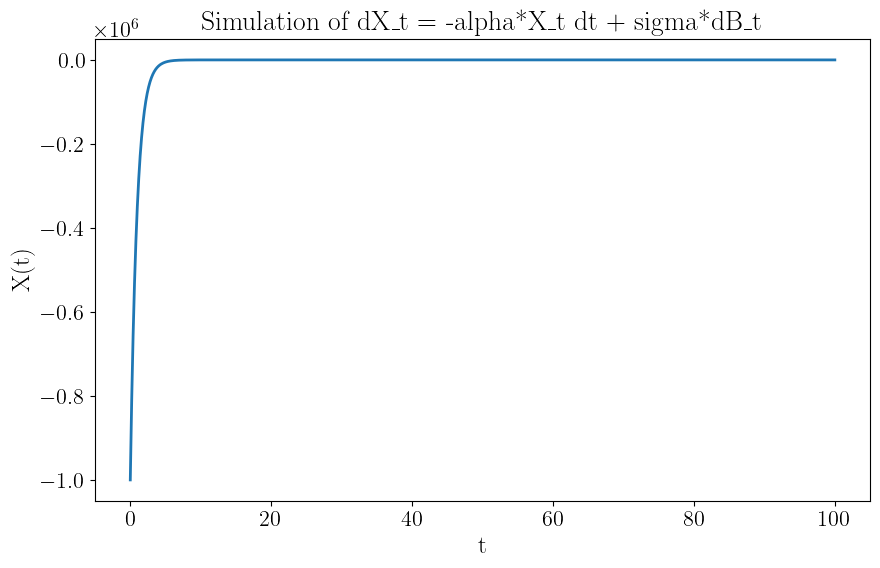

In [83]:
X0 = -1000000

OU_simulation(alpha, sigma, X0)

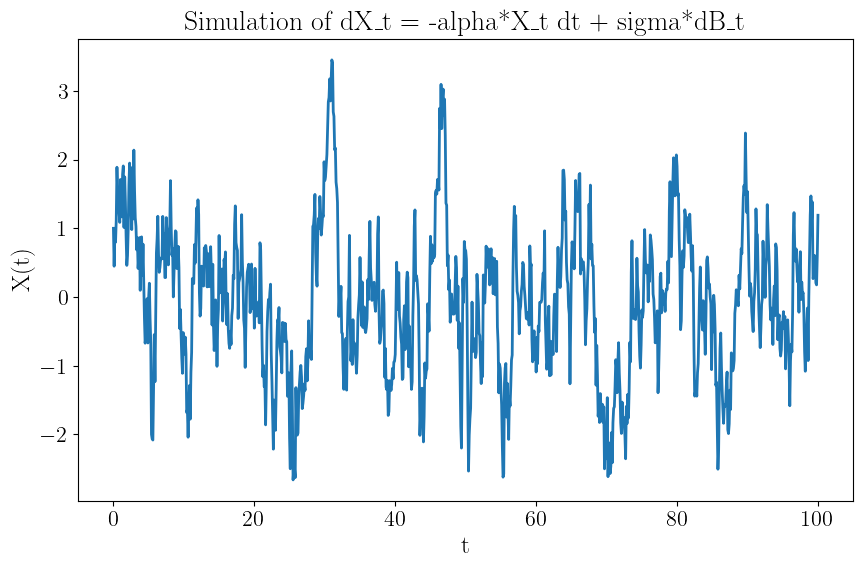

In [84]:
X0 = 1

OU_simulation(alpha, sigma, X0)

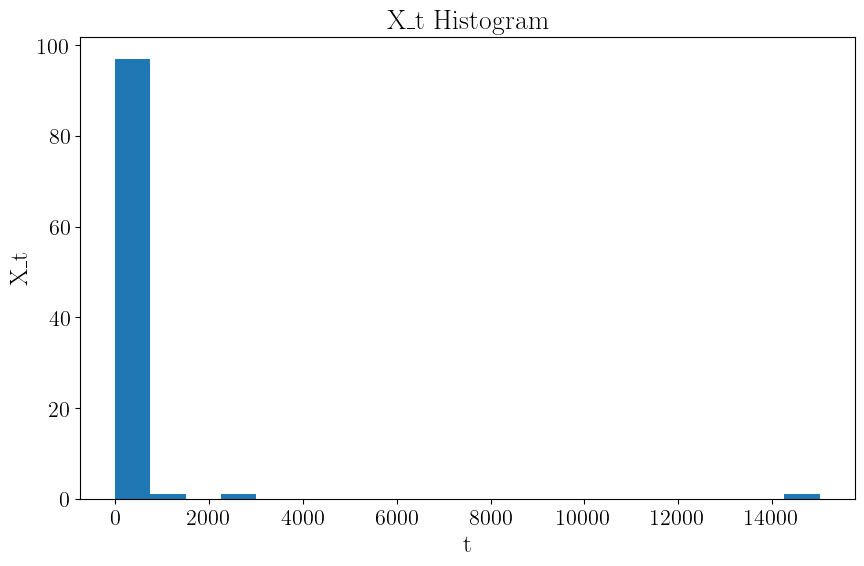

In [105]:
# Problem 8: X_t Distribution

mu = 0.5
sigma = 1
X0 = 1
n = 10000

large_values = [np.random.randint(10^3, 10^4) for i in range(100)]
dt = [large_values[i]/n for i in range(100)]

def euler(x):
    X = np.zeros(n + 1)
    X[0] = X0
    dW = np.sqrt(x) * np.random.randn(n)
    for i in range(n):
        X[i + 1] = X[i] + mu * X[i] * x + sigma * X[i] * dW[i]
    return X

X_t = []
for i in range(100):
    y = euler(dt[i])
    X_t.append(y[n])

plt.hist(X_t, bins=20)
plt.xlabel('t')
plt.ylabel('X_t')
plt.title('X_t Histogram')
plt.show()


In [94]:
# Problem 9.2: Langevin Diffusion 

t_vals = np.array([1000]*200)
x0 = 1
sigma = np.sqrt(2)

x_t = []
for t in t_vals: 
    step_size = 0.01
    n = int(t/step_size)
    x = x0
    for i in range(n): 
        x += ((-x + 3) * step_size + sigma * np.random.normal() * np.sqrt(step_size))
    x_t.append(x)

np.mean(x_t)

3.040130680427463

In [95]:
np.var(x_t)

1.096079567653905

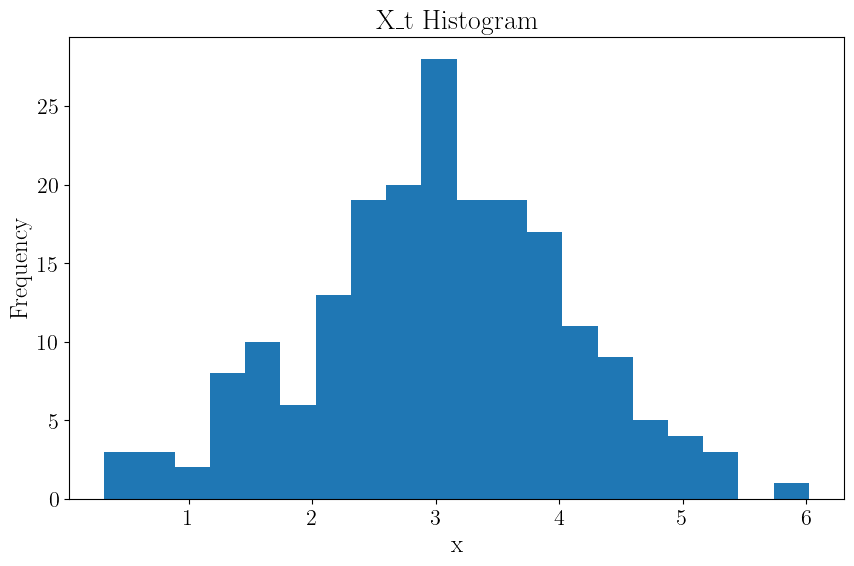

In [96]:
plt.hist(x_t, bins=20)
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('X_t Histogram')
plt.show()

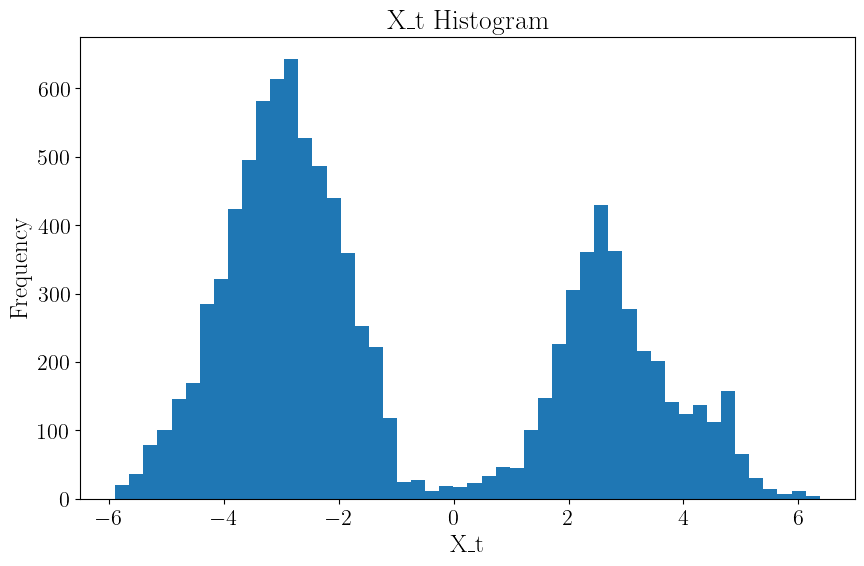

In [101]:
# Problem 9.3: Bimodal Distribution

def bimodal(steps, dt, dV):
    n = 1
    X = np.zeros((n, steps + 1))
    X[:, 0] = 1
    for i in range(n):
        for j in range(steps):
            dW = np.random.normal(0, np.sqrt(dt))
            X[i, j + 1] = X[i, j] + dV(X[i, j]) * dt + np.sqrt(2) * dW
    return X[0]

def dV(x):
    return -((x - 3) * np.exp(-0.5 * (x - 3)**2) + (x + 3) * np.exp(-0.5 * (x + 3)**2)) / (np.exp(-0.5 * (x - 3)**2) + np.exp(-0.5 * (x + 3)**2))

samples = 10000
samples2 = int(samples/2)
dt = 0.01

X_t = bimodal(samples, dt, dV)
filtered = X_t[-samples2:]

plt.hist(X_t, bins=50)
plt.xlabel('X_t')
plt.ylabel('Frequency')
plt.title('X_t Histogram')
plt.show()